In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [19]:
global NumSpecies,mu,gamma,D

In [20]:
def GetPositive(input):
    temp=[]
    for i in input:
        if i>0:
            temp.append(i)
    return temp

In [21]:
def MultiSpecies(t,y):
    global NumSpecies,mu,gamma,D
    dydt=np.zeros(NumSpecies)
    for i in range(NumSpecies):
            sumy=0
            for j in range(NumSpecies):
                sumy=sumy+y[j]
            dydt[i]=mu[i]*y[i]*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
    return dydt

In [22]:
mu0=0.5
D=0.2
gamma=0.9
NumSpecies=20
vvs=np.arange(0,1.1,0.1)
num=50
tau=np.zeros((len(vvs),num))
IniV=np.zeros((len(vvs),num))

In [23]:
for asd in range(len(vvs)):
    vv=vvs[asd]
    print(asd)
    for repeat in range(num):
        mu=mu0*(1-vv+2*vv*np.random.rand(NumSpecies))
        IniV[asd,repeat]=np.std(mu)
        
        initial=np.zeros(NumSpecies)
        for i in range(NumSpecies):
            initial[i]=1/NumSpecies
        
        cycles=30
        durations=15+15*np.random.rand(cycles)
        time=[]
        Abund=[]
        for i in range(cycles):
            mu=np.multiply(mu,(0.95+0.1*np.random.rand(NumSpecies)))
            timespan=np.arange(0,durations[i],0.1)
            if i==0:
                time=timespan
            else:
                time=np.concatenate((time,np.add(timespan,max(time))))
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval = timespan)
            y1=sol.y
            if i==0:
                Abund=y1[range(NumSpecies),:]
            else:
                Abund=np.concatenate((Abund,y1[range(NumSpecies),:]),axis=1)

            initial=y1[range(NumSpecies),-1]
    
        data=Abund
        diversity=np.zeros(np.size(data,1))
        for i in range(np.size(data,1)):
            temp=data[:,i]
            temp=GetPositive(temp)
            temp=np.divide(temp,sum(temp))
            diversity[i]=np.exp(-sum(np.multiply(temp,np.log(temp))))
        for i in range(len(diversity)):
            if diversity[i]<10:
                tau[asd,repeat]=time[i]
                break

0
1
2
3
4
5
6
7
8
9
10


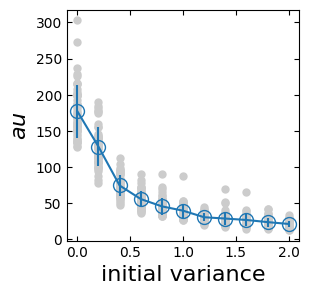

In [24]:
plt.figure(figsize=(3,3))
plt.plot(2*vvs,tau,'.',color=(0.8,0.8,0.8),markersize=10)
plt.errorbar(2*vvs,np.mean(tau,1),yerr=np.std(tau,1),marker='o',fillstyle='none',markersize=10)
    
plt.xlabel('initial variance',fontsize=16)
plt.ylabel('$\tau$',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('TimeScale.pdf')
plt.show()

In [25]:
import pandas as pd
df1=pd.DataFrame(2*vvs)
df1.to_csv("InitialWidth.csv")
df2=pd.DataFrame(tau)
df2.to_csv("Tau.csv")